DS_501 Assignment 4: Confidence Interval & Hypothesis Testing

 Step 1: Data Generation and Population Parameters
--------------------------------------------------
Girls' Heights: N(5.14, 0.25²) ft
Boys' Heights: N(5.75, 0.3²) ft
Total Students: 120 (Boys: 90, Girls: 30)

Generated Heights:
Boys - Mean: 5.720, Std: 0.279
Girls - Mean: 5.135, Std: 0.223

 Step 2: Generated Random Dataset
--------------------------------------------------
Boys' Heights (90 students):
------------------------------
5.899 5.709 5.944 6.207 5.680 5.680 6.224 5.980 5.609 5.913

Girls' Heights (30 students):
------------------------------
5.611 5.610 5.823 5.176 5.233 5.581 5.446 5.844 5.478 5.326

Girls' Heights (30 students):
------------------------------
6.190 5.682 5.770 5.323 5.587 5.783 5.405 5.863 5.570 5.662

Girls' Heights (30 students):
------------------------------
5.569 6.306 5.746 5.433 5.997 5.384 5.813 5.162 5.352 5.809

Girls' Heights (30 students):
------------------------------
5.972 5.80

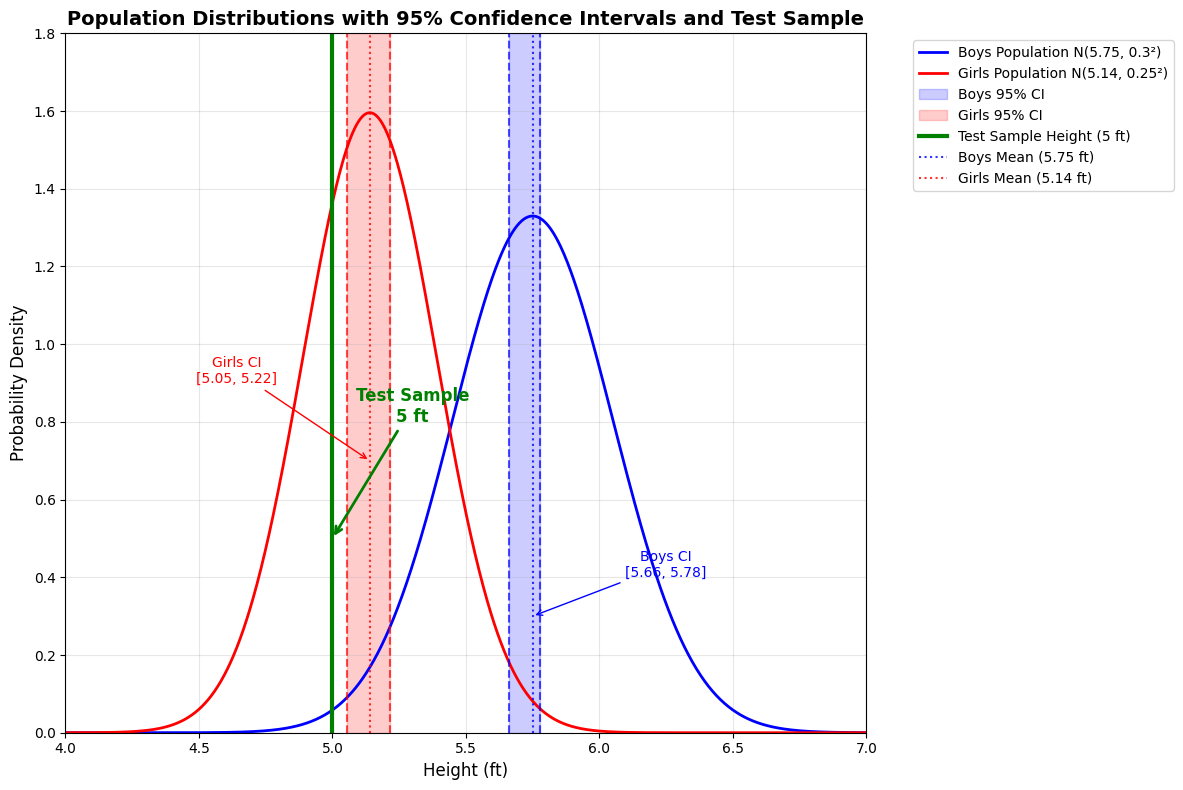


 Step 4: Hypothesis Formulation
--------------------------------------------------
Test Sample Height: 5 ft
H₀: Student belongs to boys' height distribution (Height ≥ 5.75 ft)
H₁: Student belongs to girls' height distribution (Height < 5.75 ft)
Test Type: One-tailed (left-tailed) Z-test and T-test
Significance Level: α = 0.05

 Step 5: One-tailed (left-tailed) Z-Test
--------------------------------------------------
Population Parameters (Boys):
  μ₀ = 5.75 ft
  σ = 0.3 ft

Z-Test Calculation:
  Z = (X - μ₀) / σ
  Z = (5 - 5.75) / 0.3
  Z = -2.5000

Critical Value:
  Z_critical (left-tail, α = 0.05) = -1.6449
  P-Value = 0.0062

Decision Rule:
  If Z < Z_critical (-1.6449), reject H₀
  If Z ≥ Z_critical (-1.6449), fail to reject H₀

Z-Test Decision:  REJECT H₀: Student belongs to girls' height distribution
Conclusion: Height < 5.75 ft (Girls' distribution)

 Step 6: One-tailed (left-tailed) T-Test (Unknown σ)
--------------------------------------------------
Sample Parameters (Boys)

In [4]:
# DS-501: Assignment - 4
# 11-07-2025
# Group - 4
# Name: Dr Samit Kumar Singh
# AICTE ID: 1-11277587109

import math 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, t 
print("DS_501 Assignment 4: Confidence Interval & Hypothesis Testing") 

# Step 1: Data Generation and Population Parameters 
print("\n Step 1: Data Generation and Population Parameters") 
print("-" * 50) 
# Population parameters
girls_mean = 5.14
girls_std = 0.25 
boys_mean = 5.75 
boys_std = 0.3 
# Sample sizes 
n_boys = 90 
n_girls = 30 
total_students = n_boys + n_girls 
print(f"Girls' Heights: N({girls_mean}, {girls_std}²) ft") 
print(f"Boys' Heights: N({boys_mean}, {boys_std}²) ft") 
print(f"Total Students: {total_students} (Boys: {n_boys}, Girls: {n_girls})") 
# Generate sample data 
np.random.seed(42)  # For reproducibility 
boys_heights = np.random.normal(boys_mean, boys_std, n_boys) 
girls_heights = np.random.normal(girls_mean, girls_std, n_girls) 
print(f"\nGenerated Heights:") 
print(f"Boys - Mean: {np.mean(boys_heights):.3f}, Std: {np.std(boys_heights):.3f}") 
print(f"Girls - Mean: {np.mean(girls_heights):.3f}, Std: {np.std(girls_heights):.3f}") 

# Step 2: Display Generated Dataset 
print("\n Step 2: Generated Random Dataset") 
print("-" * 50) 
print("Boys' Heights (90 students):") 
print("-" * 30) 
for i in range(0, len(boys_heights), 10): 
    row = boys_heights[i:i+10] 
    print(" ".join([f"{h:.3f}" for h in row])) 
    print("\nGirls' Heights (30 students):") 
    print("-" * 30) 
for i in range(0, len(girls_heights), 10): 
    row = girls_heights[i:i+10] 
    print(" ".join([f"{h:.3f}" for h in row])) 

# Step 3: Confidence Intervals 
print("\n Step 3: Confidence Intervals (95%)") 
print("-" * 50) 
confidence_level = 0.95 
alpha = 1 - confidence_level 
z_critical = norm.ppf(1 - alpha/2) 
# Boys' confidence interval 
boys_sample_mean = np.mean(boys_heights) 
boys_sample_std = np.std(boys_heights, ddof=1) 
boys_margin_error = z_critical * (boys_sample_std / math.sqrt(n_boys)) 
boys_ci_lower = boys_sample_mean - boys_margin_error 
boys_ci_upper = boys_sample_mean + boys_margin_error 
# Girls' confidence interval 
girls_sample_mean = np.mean(girls_heights) 
girls_sample_std = np.std(girls_heights, ddof=1) 
girls_margin_error = z_critical * (girls_sample_std / math.sqrt(n_girls)) 
girls_ci_lower = girls_sample_mean - girls_margin_error 
girls_ci_upper = girls_sample_mean + girls_margin_error 
print(f"Boys' 95% CI: [{boys_ci_lower:.3f}, {boys_ci_upper:.3f}] ft") 
print(f"Girls' 95% CI: [{girls_ci_lower:.3f}, {girls_ci_upper:.3f}] ft") 
print(f"Z-critical value (α = {alpha}): ±{z_critical:.3f}") 
# Visualization: Population Distribution with CI and Test Sample 
print("\n Population Distribution Visualization") 
print("-" * 50) 
fig, ax = plt.subplots(1, 1, figsize=(12, 8)) 
# Create x-axis for plotting 
x = np.linspace(4.0, 7.0, 1000) 
# Plot population distributions 
boys_pdf = norm.pdf(x, boys_mean, boys_std) 
girls_pdf = norm.pdf(x, girls_mean, girls_std) 
ax.plot(x, boys_pdf, label='Boys Population N(5.75, 0.3²)', color='blue', linewidth=2) 
ax.plot(x, girls_pdf, label='Girls Population N(5.14, 0.25²)', color='red', linewidth=2) 
 
# Mark confidence intervals 
ax.axvspan(boys_ci_lower, boys_ci_upper, alpha=0.2, color='blue', label='Boys 95% CI') 
ax.axvspan(girls_ci_lower, girls_ci_upper, alpha=0.2, color='red', label='Girls 95% CI') 
 
# Mark confidence interval boundaries 
ax.axvline(boys_ci_lower, color='blue', linestyle='--', alpha=0.7) 
ax.axvline(boys_ci_upper, color='blue', linestyle='--', alpha=0.7) 
ax.axvline(girls_ci_lower, color='red', linestyle='--', alpha=0.7) 
ax.axvline(girls_ci_upper, color='red', linestyle='--', alpha=0.7) 
 
# Mark the test sample height 
test_height = 5 
ax.axvline(test_height, color='green', linestyle='-', linewidth=3, label=f'Test Sample Height ({test_height} ft)') 
 
# Mark population means 
ax.axvline(boys_mean, color='blue', linestyle=':', alpha=0.8, label=f'Boys Mean ({boys_mean} ft)') 
ax.axvline(girls_mean, color='red', linestyle=':', alpha=0.8, label=f'Girls Mean ({girls_mean} ft)') 
 
# Annotations 
ax.annotate(f'Test Sample\n{test_height} ft',  
            xy=(test_height, 0.5), xytext=(test_height+0.3, 0.8), 
            arrowprops=dict(arrowstyle='->', color='green', lw=2), 
            fontsize=12, ha='center', color='green', weight='bold') 
 
ax.annotate(f'Boys CI\n[{boys_ci_lower:.2f}, {boys_ci_upper:.2f}]',  
            xy=(boys_mean, 0.3), xytext=(boys_mean+0.5, 0.4), 
            arrowprops=dict(arrowstyle='->', color='blue', lw=1), 
            fontsize=10, ha='center', color='blue') 
 
ax.annotate(f'Girls CI\n[{girls_ci_lower:.2f}, {girls_ci_upper:.2f}]',  
            xy=(girls_mean, 0.7), xytext=(girls_mean-0.5, 0.9), 
            arrowprops=dict(arrowstyle='->', color='red', lw=1), 
            fontsize=10, ha='center', color='red') 
 
ax.set_xlabel('Height (ft)', fontsize=12) 
ax.set_ylabel('Probability Density', fontsize=12) 
ax.set_title('Population Distributions with 95% Confidence Intervals and Test Sample', 
fontsize=14, fontweight='bold') 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
ax.grid(True, alpha=0.3) 
 
# Set axis limits for better visualization 
ax.set_xlim(4.0, 7.0) 
ax.set_ylim(0, 1.8) 
plt.tight_layout() 
plt.show() 

# Step 4: Hypothesis Formulation 
print("\n Step 4: Hypothesis Formulation") 
print("-" * 50) 
#test_height = 5  # Test sample height 
print(f"Test Sample Height: {test_height} ft") 
print(f"H₀: Student belongs to boys' height distribution (Height ≥ 5.75 ft)") 
print(f"H₁: Student belongs to girls' height distribution (Height < 5.75 ft)") 
print(f"Test Type: One-tailed (left-tailed) Z-test and T-test") 
print(f"Significance Level: α = 0.05") 

# Step 5: One-tailed (left-tailed) Z-Test 
print("\n Step 5: One-tailed (left-tailed) Z-Test") 
print("-" * 50) 
# Z-Test: Testing if student height belongs to boys' distribution 
# H₀: μ ≥ 5.75 (boys' distribution) 
# H₁: μ < 5.75 (girls' distribution) 
z_stat = (test_height - boys_mean) / boys_std 
z_critical_left = norm.ppf(0.05)  # Left-tailed critical value at α = 0.05 
p_value_z = norm.cdf(z_stat) 
print(f"Population Parameters (Boys):") 
print(f"  μ₀ = {boys_mean} ft") 
print(f"  σ = {boys_std} ft") 
print(f"\nZ-Test Calculation:") 
print(f"  Z = (X - μ₀) / σ") 
print(f"  Z = ({test_height} - {boys_mean}) / {boys_std}") 
print(f"  Z = {z_stat:.4f}") 
print(f"\nCritical Value:") 
print(f"  Z_critical (left-tail, α = 0.05) = {z_critical_left:.4f}") 
print(f"  P-Value = {p_value_z:.4f}") 
# Decision Rule for Z-test 
print(f"\nDecision Rule:") 
print(f"  If Z < Z_critical ({z_critical_left:.4f}), reject H₀") 
print(f"  If Z ≥ Z_critical ({z_critical_left:.4f}), fail to reject H₀") 
if z_stat < z_critical_left: 
    z_decision = " REJECT H₀: Student belongs to girls' height distribution" 
    z_conclusion = "Height < 5.75 ft (Girls' distribution)" 
else: 
    z_decision = " FAIL TO REJECT H₀: Student belongs to boys' height distribution" 
    z_conclusion = "Height ≥ 5.75 ft (Boys' distribution)" 
print(f"\nZ-Test Decision: {z_decision}") 
print(f"Conclusion: {z_conclusion}") 

# Step 6: One-tailed (left-tailed) T-Test 
print("\n Step 6: One-tailed (left-tailed) T-Test (Unknown σ)") 
print("-" * 50) 
# T-Test: Using sample standard deviation when population σ is unknown 
# H₀: μ ≥ 5.75 (boys' distribution) 
# H₁: μ < 5.75 (girls' distribution) 
sample_std_est = boys_sample_std 
degrees_freedom = n_boys - 1 
standard_error = sample_std_est / math.sqrt(n_boys) 
t_stat = (test_height - boys_sample_mean) / standard_error 
t_critical_left = t.ppf(0.05, degrees_freedom)  # Left-tailed critical value 
p_value_t = t.cdf(t_stat, degrees_freedom) 
print(f"Sample Parameters (Boys):") 
print(f"  Sample Mean (X) = {boys_sample_mean:.3f} ft") 
print(f"  Sample Std Dev (s) = {sample_std_est:.3f} ft") 
print(f"  Sample Size (n) = {n_boys}") 
print(f"  Degrees of Freedom = {degrees_freedom}") 
print(f"\nT-Test Calculation:") 
print(f"  Standard Error = s / √n = {sample_std_est:.3f} / √{n_boys} = {standard_error:.4f}") 
print(f"  t = (X - μ₀) / (s / √n)") 
print(f"  t = ({test_height} - {boys_sample_mean:.3f}) / {standard_error:.4f}") 
print(f"  t = {t_stat:.4f}") 
print(f"\nCritical Value:") 
print(f"  t_critical (left-tail, α = 0.05, df = {degrees_freedom}) = {t_critical_left:.4f}") 
print(f"  P-Value = {p_value_t:.4f}") 
# Decision Rule for T-test 
print(f"\nDecision Rule:") 
print(f"  If t < t_critical ({t_critical_left:.4f}), reject H₀") 
print(f"  If t ≥ t_critical ({t_critical_left:.4f}), fail to reject H₀") 
if t_stat < t_critical_left: 
    t_decision = " REJECT H₀: Student belongs to girls' height distribution" 
    t_conclusion = "Height < 5.75 ft (Girls' distribution)" 
else: 
    t_decision = " FAIL TO REJECT H₀: Student belongs to boys' height distribution" 
    t_conclusion = "Height ≥ 5.75 ft (Boys' distribution)" 
print(f"\nT-Test Decision: {t_decision}") 
print(f"Conclusion: {t_conclusion}") 

# Step 6.5: Comparison of Z-Test vs T-Test Results 
print("\n Step 6.5: Comparison of Z-Test vs T-Test Results") 
print("-" * 50) 
print(f"{'Test Type':<15} {'Test Statistic':<15} {'Critical Value':<15} {'P-Value':<10} {'Decision'}") 
print("-" * 75) 
print(f"{'Z-Test':<15} {z_stat:<15.4f} {z_critical_left:<15.4f} {p_value_z:<10.4f} {'Reject H₀' if z_stat 
< z_critical_left else 'Fail to Reject H₀'}") 
print(f"{'T-Test':<15} {t_stat:<15.4f} {t_critical_left:<15.4f} {p_value_t:<10.4f} {'Reject H₀' if t_stat 
< t_critical_left else 'Fail to Reject H₀'}") 
print("-" * 75) 

# Step 7: Error Analysis 
print("\n  Step 7: Error Analysis") 
print("-" * 50) 
# Type I Error (α): Probability of rejecting H₀ when it's true 
type_i_error = 0.05  # Given α 
print(f"Type I Error (α): {type_i_error}") 
print(f"Interpretation: Probability of classifying a boy as a girl = {type_i_error*100}%") 
# Type II Error (β): Probability of accepting H₀ when it's false 
# P(Height > critical_value | Girl's distribution) 
critical_height = boys_mean + z_critical_left * boys_std 
type_ii_error = 1 - norm.cdf(critical_height, girls_mean, girls_std) 
power = 1 - type_ii_error 
print(f"\nCritical Height: {critical_height:.3f} ft") 
print(f"Type II Error (β): {type_ii_error:.4f}") 
print(f"Interpretation: Probability of classifying a girl as a boy = {type_ii_error*100:.2f}%") 
print(f"Statistical Power: {power:.4f}") 

# Step 8: Effect of Sample Size on Type I and Type II Errors 
print("\n Step 8: Effect of Sample Size on Type I and Type II Errors") 
print("=" * 60) 
sample_sizes = [10, 50, 70] 
type_i_fixed = 0.05  # Type I error remains constant 
print(f"Type I Error (α) remains constant at {type_i_fixed} for all sample sizes") 
print("\nEffect on Type II Error and Statistical Power:") 
print("-" * 60) 
print(f"{'Sample Size':<12} {'Type I Error':<12} {'Type II Error':<12} {'Power':<12}") 
print("-" * 60) 
for n in sample_sizes: 
    # Type II error calculation for different sample sizes 
    # Standard error decreases with larger sample size 
    standard_error = boys_std / math.sqrt(n) 
     
    # Critical value for the test 
    critical_height_n = boys_mean + z_critical_left * standard_error 
     
    # Type II error: P(accept H₀ | H₁ is true) 
    # This is P(X > critical_height | X ~ N(girls_mean, girls_std)) 
    type_ii_error_n = 1 - norm.cdf(critical_height_n, girls_mean, girls_std) 
    power_n = 1 - type_ii_error_n 
     
    print(f"{n:<12} {type_i_fixed:<12.4f} {type_ii_error_n:<12.4f} {power_n:<12.4f}") 
 
print("\nDetailed Analysis:") 
print("-" * 40) 
 
for n in sample_sizes: 
    print(f"\nSample Size n = {n}:") 
     
    # Generate sample for this size 
    np.random.seed(42) 
    sample_heights = np.random.normal(boys_mean, boys_std, n) 
    sample_mean = np.mean(sample_heights) 
    sample_std = np.std(sample_heights, ddof=1) 
     
    # Standard error 
    standard_error = sample_std / math.sqrt(n) 
     
    # Z-test with the test sample 
    z_stat_n = (test_height - sample_mean) / standard_error 
    p_value_n = norm.cdf(z_stat_n) 
     
    # Critical height for this sample size 
    critical_height_n = boys_mean + z_critical_left * (boys_std / math.sqrt(n)) 
     
    # Type II error calculation 
    type_ii_error_n = 1 - norm.cdf(critical_height_n, girls_mean, girls_std) 
    power_n = 1 - type_ii_error_n 
     
    print(f"  Sample Mean: {sample_mean:.3f} ft") 
    print(f"  Sample Std Dev: {sample_std:.3f} ft") 
    print(f"  Standard Error: {standard_error:.4f}") 
    print(f"  Z-Statistic: {z_stat_n:.4f}") 
    print(f"  P-Value: {p_value_n:.4f}") 
    print(f"  Critical Height: {critical_height_n:.3f} ft") 
    print(f"  Type II Error (β): {type_ii_error_n:.4f}") 
    print(f"  Statistical Power: {power_n:.4f}") 
     
    # Decision for this sample size 
if z_stat_n < z_critical_left: 
    decision_n = "REJECT H₀" 
else: 
    decision_n = "FAIL TO REJECT H₀" 
    print(f"  Decision: {decision_n}") 
# Summary and Key Observations 
print("\n SUMMARY & KEY OBSERVATIONS") 
print("=" * 60) 
print(f"Test Height: {test_height} ft") 
print(f"Z-Test Result: {z_decision}") 
print(f"T-Test Result: {t_decision}") 
print(f"""Type I Error: {type_i_error*100}% | 
Type II Error: {type_ii_error*100:.2f}% |
Power: {power:.4f}""") 
print("\nKey Findings:") 
print("• Type I Error (α) remains constant at 5% regardless of sample size") 
print("• Type II Error (β) decreases and Power increases with larger sample sizes") 
print("• Standard error decreases as sample size increases (SE = σ/√n)") 
print("\nSample Size Effects:") 
for n in sample_sizes: 
    standard_error = boys_std / math.sqrt(n) 
    critical_height_n = boys_mean + z_critical_left * standard_error 
    type_ii_error_n = 1 - norm.cdf(critical_height_n, girls_mean, girls_std) 
    power_n = 1 - type_ii_error_n 
print(f"  n={n}: β={type_ii_error_n:.3f}, Power={power_n:.3f}") 
print("=" * 60) 